In [1]:
from src.components.nn_data_ingestion import FraudDetectionDataset
from src.baseline.data_ingestion import DataIngestorFactory, DataIngestorConfig
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint  # Updated import
from src.utils import setup_logger, seed_everything
from src.exception import CustomException
from src.baseline.features_engineering import PreprocessorPipeline
import pandas as pd
import os

In [2]:

os.chdir(rf"c:\Users\thuhi\workspace\fraud_detection")
print(os.getcwd())

factory = DataIngestorFactory()
ingestor = factory.create_ingestor("duration_pkl")
train_df, validation_df = ingestor.ingest(
    dir_path=rf"C:\Users\thuhi\workspace\fraud_detection\data\raw_data",
    start_train_date="2018-06-01",
    train_duration=14,
    test_duration=14,
    delay=7
)

train_preprocessed = PreprocessorPipeline(train_df).process()
validation_preprocessed = PreprocessorPipeline(validation_df).process()

c:\Users\thuhi\workspace\fraud_detection


In [3]:
train_data = FraudDetectionDataset(train_preprocessed, mode="transformed")
validation_data = FraudDetectionDataset(validation_preprocessed, mode="transformed")
batch_size = 2048
train_loader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,
    persistent_workers=True
)
validation_loader = DataLoader(
    validation_data,
    batch_size=batch_size,
    num_workers=8,
    persistent_workers=True,
    shuffle=False)
validation_preprocessed

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD
0,0.014965,0.0,1.0,0.076923,0.107720,0.454545,0.085400,0.447368,0.083940,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
1,0.002633,0.0,0.0,0.307692,0.058410,0.659091,0.084490,0.486842,0.078889,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2,0.092200,0.0,0.0,0.230769,0.121379,0.363636,0.088428,0.263158,0.086632,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
3,0.092237,0.0,0.0,0.000000,0.032520,0.159091,0.027572,0.092105,0.027572,0.500000,0.0,0.269231,0.0,0.269231,0.0,0
4,0.010381,0.0,1.0,0.076923,0.050045,0.454545,0.051015,0.421053,0.045588,0.125000,0.0,0.115385,0.0,0.115385,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178830,0.279281,1.0,0.0,0.011844,0.008072,0.388095,0.009827,0.291479,0.010465,0.144246,0.0,0.177533,0.0,0.177533,0.0,1
178831,0.672869,0.0,0.0,0.076923,0.037168,0.296964,0.050847,0.251623,0.051162,0.061907,0.0,0.114290,0.0,0.114290,0.0,1
178832,0.468710,1.0,0.0,0.208455,0.059228,0.100451,0.078748,0.110653,0.094505,0.000000,0.0,0.000000,0.0,0.000000,0.0,1
178833,0.221809,0.0,0.0,0.076923,0.007044,0.181818,0.013015,0.114239,0.012772,0.110789,0.0,0.170445,0.0,0.170445,0.0,1


In [4]:
validation_preprocessed[validation_preprocessed["TX_FRAUD"]==1]

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD
561,0.014442,0.0,1.0,0.153846,0.104932,0.090909,0.108972,0.052632,0.108972,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
562,0.010475,1.0,1.0,0.076923,0.170933,0.227273,0.137422,0.131579,0.137422,0.125000,0.0,0.500000,0.076923,0.576923,0.066667,1
563,0.053821,1.0,1.0,0.307692,0.099904,0.295455,0.092293,0.236842,0.099058,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
564,0.011427,0.0,0.0,0.153846,0.056399,0.772727,0.064199,0.500000,0.064763,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
565,0.012118,0.0,0.0,0.000000,0.007617,0.000000,0.008908,0.000000,0.008908,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178830,0.279281,1.0,0.0,0.011844,0.008072,0.388095,0.009827,0.291479,0.010465,0.144246,0.0,0.177533,0.000000,0.177533,0.000000,1
178831,0.672869,0.0,0.0,0.076923,0.037168,0.296964,0.050847,0.251623,0.051162,0.061907,0.0,0.114290,0.000000,0.114290,0.000000,1
178832,0.468710,1.0,0.0,0.208455,0.059228,0.100451,0.078748,0.110653,0.094505,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1
178833,0.221809,0.0,0.0,0.076923,0.007044,0.181818,0.013015,0.114239,0.012772,0.110789,0.0,0.170445,0.000000,0.170445,0.000000,1


In [5]:
import torch
from src.components.feed_forward_nn import Feed_Forward_NN

# Prepare test data
test_data = torch.tensor(validation_preprocessed[DataIngestorConfig.input_features_transformed].to_numpy(), dtype=torch.float32)
# Normalize if needed (replace with your training mean/std)
# mean = torch.tensor(train_mean)
# std = torch.tensor(train_std)
# test_data = (test_data - mean) / std

# Load the model
model = Feed_Forward_NN.load_from_checkpoint(
    rf"C:\Users\thuhi\workspace\fraud_detection\checkpoints\best-model-epoch=03-val_loss=1.88.ckpt",
    input_size=len(DataIngestorConfig.input_features_transformed),
    hidden_size=512,
    pos_weight = torch.tensor(train_preprocessed[DataIngestorConfig().output_feature].sum()
                              / (len(train_preprocessed) - train_preprocessed[DataIngestorConfig().output_feature].sum()))
)
model.eval()

# Move test data to the same device as the model
test_data = test_data.to(model.device)
print(f"Test data shape: {test_data.shape}")
print(f"Model device: {next(model.parameters()).device}")

# Predict with the model
with torch.no_grad():  # Disable gradient computation for inference
    y_hat = model(test_data)
    y_prob = torch.sigmoid(y_hat)  # Convert logits to probabilities
    y_pred = (y_prob > 0.5).float()  # Binary predictions

# Print some predictions
print(f"Predicted probabilities: {y_prob}")
print(f"Binary predictions: {y_pred}")

# Compute metrics (assuming you have validation_labels)


Test data shape: torch.Size([178835, 15])
Model device: cuda:0
Predicted probabilities: tensor([[0.4386],
        [0.7323],
        [0.8802],
        ...,
        [0.9383],
        [0.9496],
        [0.9008]], device='cuda:0')
Binary predictions: tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0')


In [6]:
predicted_proba = pd.DataFrame(y_prob.cpu())
validation_preprocessed = PreprocessorPipeline(validation_df).process()
validation_preprocessed

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD
0,0.014965,0.0,1.0,0.076923,0.107720,0.454545,0.085400,0.447368,0.083940,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
1,0.002633,0.0,0.0,0.307692,0.058410,0.659091,0.084490,0.486842,0.078889,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2,0.092200,0.0,0.0,0.230769,0.121379,0.363636,0.088428,0.263158,0.086632,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
3,0.092237,0.0,0.0,0.000000,0.032520,0.159091,0.027572,0.092105,0.027572,0.500000,0.0,0.269231,0.0,0.269231,0.0,0
4,0.010381,0.0,1.0,0.076923,0.050045,0.454545,0.051015,0.421053,0.045588,0.125000,0.0,0.115385,0.0,0.115385,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178830,0.279281,1.0,0.0,0.011844,0.008072,0.388095,0.009827,0.291479,0.010465,0.144246,0.0,0.177533,0.0,0.177533,0.0,1
178831,0.672869,0.0,0.0,0.076923,0.037168,0.296964,0.050847,0.251623,0.051162,0.061907,0.0,0.114290,0.0,0.114290,0.0,1
178832,0.468710,1.0,0.0,0.208455,0.059228,0.100451,0.078748,0.110653,0.094505,0.000000,0.0,0.000000,0.0,0.000000,0.0,1
178833,0.221809,0.0,0.0,0.076923,0.007044,0.181818,0.013015,0.114239,0.012772,0.110789,0.0,0.170445,0.0,0.170445,0.0,1


<Axes: xlabel='prob', ylabel='Count'>

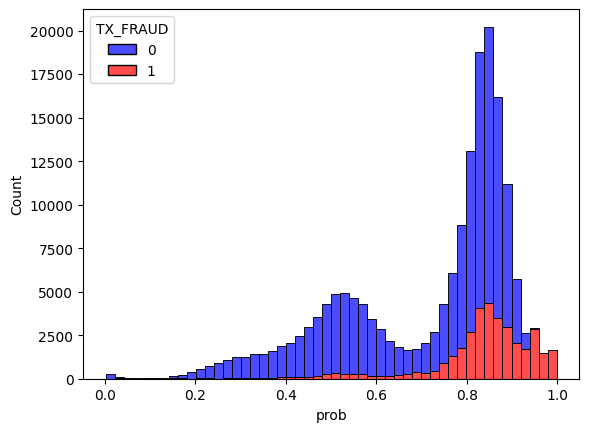

In [7]:
import seaborn as sns
validation_preprocessed["prob"] = predicted_proba
sns.histplot(
    data=validation_preprocessed,
    x="prob",
    hue="TX_FRAUD",
    multiple="stack",
    bins=50,
    palette={0: "blue", 1: "red"},
    alpha=0.7
)